# Final Model for CSV 

Learning from my prototype, i saw that my dataset is small. I decided to use another CSV file that comprises all the audio features for 3 seconds. Essentially, a 30-second audio file is split into 3-second audio snippets, giving the three models 10,000 lines of data to train with. However, one of the audio files was corrupted, resulting in 9990 lines of data. 

In [18]:
import pandas as pd
import numpy as np
import os 
import librosa
import librosa.display as ld
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import tensorflow as tf 
from tensorflow import keras
from keras import layers 
from tensorflow.keras import Sequential 
import cv2 
import os 
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('data/features_3_sec.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [3]:
df.shape

(9990, 60)

I would first dop the filename as that is not needed to train my model.

In [4]:
df= df.drop('filename',axis=1)

I will then drop the label of as i would only want the X data to be the features of the audio. Below is where i will assign the feature to X. 

In [5]:
X = df.drop(['label'],axis =1)
X = X.iloc[0:,2:]
X.head()

,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,1.080790e+06,0.081851,...,-2.853603,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767
1,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,6.722448e+05,0.087173,...,4.074709,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081
2,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,7.907127e+05,0.071383,...,4.806280,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122
3,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,9.216524e+05,0.069426,...,-1.359111,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678
4,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,6.102111e+05,0.070095,...,2.092937,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694


As for the y data, i would want it to be the label(genre)  of the audio. 

In [6]:
y = df['label']
y

0       blues
1       blues
2       blues
3       blues
4       blues
        ...  
9985     rock
9986     rock
9987     rock
9988     rock
9989     rock
Name: label, Length: 9990, dtype: object

Once I am done assigning the data, i would then do the preprocessing of the features using the MinMax scaler so that the data is scaled accordingly. 

In [7]:
# Scale the features using minmax scaler 
transformer = MinMaxScaler()
# transformer = preprocessing.MinMaxScaler()
x_trans = transformer.fit_transform(X)
X = pd.DataFrame(x_trans,columns = X.columns)
X.head()

,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.716757,0.293133,0.107955,0.262173,0.034784,0.459205,0.094130,0.346153,0.083164,0.204458,...,0.363613,0.056198,0.397172,0.066062,0.371828,0.055344,0.380831,0.026797,0.506746,0.047781
1,0.670347,0.253040,0.044447,0.270969,0.018716,0.470831,0.052261,0.363722,0.051694,0.220384,...,0.468596,0.092912,0.351681,0.074001,0.362068,0.076365,0.418452,0.082414,0.593029,0.065548
2,0.728067,0.296753,0.141663,0.265293,0.023073,0.494051,0.059922,0.378215,0.060820,0.173133,...,0.479681,0.096704,0.420979,0.050639,0.400536,0.067509,0.433742,0.043841,0.546264,0.036062
3,0.677066,0.298024,0.075042,0.238427,0.023187,0.455246,0.066234,0.329587,0.070906,0.167277,...,0.386258,0.067995,0.387474,0.050617,0.380430,0.050030,0.405824,0.041898,0.562204,0.034873
4,0.689113,0.322308,0.052149,0.233460,0.016451,0.451651,0.047830,0.318453,0.046916,0.169278,...,0.438567,0.042500,0.460314,0.083860,0.388590,0.076524,0.409019,0.020763,0.517913,0.031713


<AxesSubplot:xlabel='pca_col1', ylabel='pca_col2'>

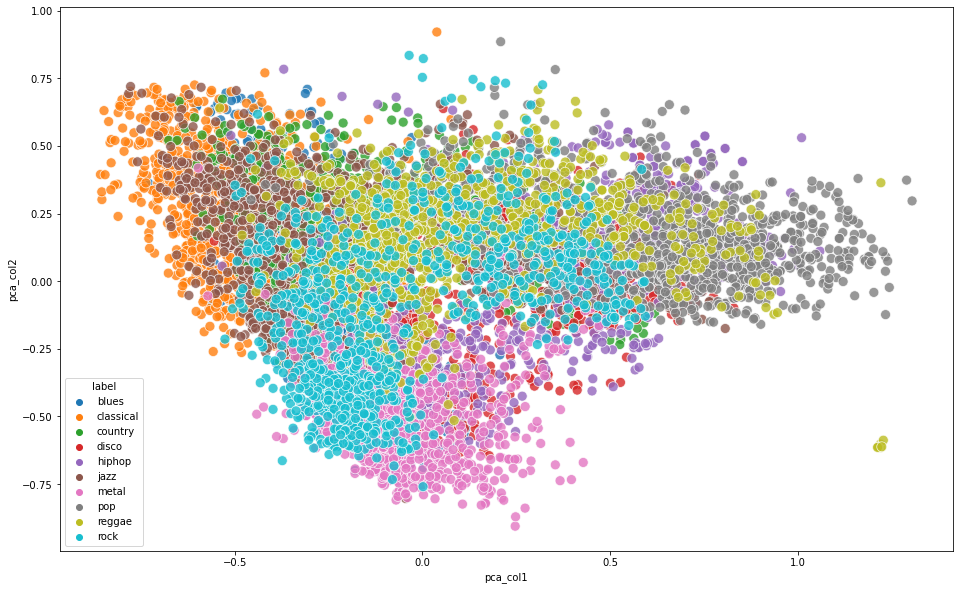

In [8]:
PCA_model = PCA(n_components = 2) 
df_min = PCA_model.fit_transform(X)
df_min = pd.DataFrame(df_min, columns = ['pca_col1', 'pca_col2'])
df_min = pd.concat([df_min, y], axis = 1)
plt.figure(figsize = (16, 10))
sns.scatterplot(x = df_min['pca_col1'], y = df_min['pca_col2'], data = df_min, hue = 'label', s = 100, alpha = 0.8)

This is where i will label encode the label(genre) of the audio. Once all the preprocessing step is done, we are then ready to split the data accordingly. 80% for training ,  20% for testing. Within the training set, we will split it further to a validation set.

In [28]:
from sklearn.preprocessing import LabelEncoder 
label_encoder = LabelEncoder() # One hot encode the music genres   

df['label']= label_encoder.fit_transform(df['label'])
y = df['label']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [10]:
X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.2)
print('X_train :' , X_train.shape)
print('X_test :' , x_test.shape)
print('Y_train :' , Y_train.shape)
print('Y_test :' , y_test.shape)

X_train : (7992, 56)
X_test : (1998, 56)
Y_train : (7992,)
Y_test : (1998,)


In [11]:
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.2)
print('x_train :' , x_train.shape)
print('x_val :' , x_val.shape)
print('y_train :' , y_train.shape)
print('y_val :' , y_val.shape)

x_train : (6393, 56)
x_val : (1599, 56)
y_train : (6393,)
y_val : (1599,)


For every model, i would first run with the training set and evaluate against the validation set. So the first two model sthat i am going to use is the KNN and SVM model. This cell below is a helper code to run both of the  model at the same time. 

In [12]:

def fit_validation_model(model):
    tf.random.set_seed(3) 
    model.fit(x_train, y_train) # train with partial training set 
    y_pred = model.predict(x_val) # evaluate against the validation set
    print(model)
    print('\n Train accuracy ',model.score(x_train, y_train))
    print('\n Validation Accuracy:',metrics.accuracy_score(y_val, y_pred)) 
    print("-------------------------------- ","\n")

In [13]:
models=[KNeighborsClassifier(n_neighbors=5),
          SVC()]

In [14]:
for model in models:
    fit_validation_model(model)

KNeighborsClassifier()

 Train accuracy  0.9324260910370717

 Validation Accuracy: 0.8855534709193246
--------------------------------  

SVC()

 Train accuracy  0.7594243704051307

 Validation Accuracy: 0.7392120075046904
--------------------------------  



Based on the above results, I would like to improve accuracy and avoid model overfitting. As a result, I'll use the Grid Search Cross Validation technique to adjust my hyperparameters. With this technique, I can train both of my models at once with the ideal hyperparameters and avoid overfitting. 


In [15]:
# grid search CV 
tf.random.set_seed(3) 
knn_grid_params = {'n_neighbors': np.arange(4,5,6),
                'metric':['euclidean', 'manhattan']}
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid=knn_grid_params)
knn_grid.fit(x_train, y_train)
best_knn_model = knn_grid.best_estimator_
print(knn_grid.best_params_)
print("accuracy", knn_grid.best_score_)
print("val_accuracy", metrics.accuracy_score(y_val, best_knn_model.predict(x_val)))

{'metric': 'manhattan', 'n_neighbors': 4}
accuracy 0.8754888465533887
val_accuracy 0.9074421513445904


The outcome reveals an increase in validation accuracy from 88.5% to 90.7%. So, using the best hyperparameters from the aforementioned result, I trained it on the entire training set and then tested it against the test set. As a result, using the best hyperparameters, it was able to achieve a test accuracy of 91.0%. 

In [16]:
tf.random.set_seed(3) 
knn_grid.fit(X_train,Y_train)
best_knn_model = knn_grid.best_estimator_
print(knn_grid.best_params_)
print("accuracy", knn_grid.best_score_)
print("test_accuracy", metrics.accuracy_score(y_test, best_knn_model.predict(x_test)))

{'metric': 'manhattan', 'n_neighbors': 4}
accuracy 0.8985234826835609
test_accuracy 0.9109109109109109


With the test accuracy being 91.0%, i generated the classification report below. The classification report consists the precision, recall, f1 score. 

In [19]:
y_pred = best_knn_model.predict(x_test)
y_ground_truth = y_test

print(classification_report(y_ground_truth, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       206
           1       0.84      0.99      0.91       188
           2       0.83      0.92      0.87       177
           3       0.87      0.94      0.90       205
           4       0.97      0.90      0.93       205
           5       0.95      0.80      0.87       198
           6       0.98      0.97      0.97       209
           7       0.95      0.90      0.92       203
           8       0.90      0.94      0.92       204
           9       0.89      0.80      0.84       203

    accuracy                           0.91      1998
   macro avg       0.91      0.91      0.91      1998
weighted avg       0.91      0.91      0.91      1998



## SVM 



In [21]:
tf.random.set_seed(3) 
SVC_grid_params = {'C': [1, 10, 100], 'gamma': [1,0.1,0.01],'kernel': ['rbf', 'poly', 'sigmoid']}
SVC_grid = GridSearchCV(SVC(), param_grid=SVC_grid_params)
SVC_grid.fit(x_train, y_train)
best_svc_model = SVC_grid.best_estimator_
print(SVC_grid.best_params_)
print("accuracy", SVC_grid.best_score_)
print("val_accuracy", metrics.accuracy_score(y_val, best_svc_model.predict(x_val)))

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}
accuracy 0.8890965286113344
val_accuracy 0.8961851156973109


The outcome indicates that the validation accuracy rose from 73.9% to 89.6%. So, using the best hyperparameters from the aforementioned result, I trained it on the entire training set and then tested it against the test set. We can see that it achieved a test accuracy of 90.5% with the best hyperparameters as a result. 

In [22]:
SVC_grid.fit(X_train,Y_train)
best_svc_model = SVC_grid.best_estimator_
print(SVC_grid.best_params_)
print("accuracy", SVC_grid.best_score_)
print("test_accuracy", metrics.accuracy_score(y_test, best_svc_model.predict(x_test)))

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}
accuracy 0.9011515332251617
test_accuracy 0.928928928928929


With the test accuracy being 92.8%, i generated the classification report below. The classification report consists the precision, recall, f1 score. 

In [23]:
y_pred = best_svc_model.predict(x_test)
y_ground_truth = y_test

print(classification_report(y_ground_truth, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       206
           1       0.95      0.98      0.96       188
           2       0.85      0.92      0.88       177
           3       0.93      0.94      0.93       205
           4       0.94      0.90      0.92       205
           5       0.94      0.96      0.95       198
           6       0.96      0.96      0.96       209
           7       0.93      0.93      0.93       203
           8       0.96      0.94      0.95       204
           9       0.88      0.80      0.84       203

    accuracy                           0.93      1998
   macro avg       0.93      0.93      0.93      1998
weighted avg       0.93      0.93      0.93      1998



As you can see from the result, the validation accuracy is either higher then the training accuracy or the difference between them isnt big. This proves that the data is not overfitting and the result achieved from these two models are highly satisfactory. 

Using the concept of grid search CV, we can see that the result from Knn classifier and the SVM classifer are way higher than the expected baseline (prototype) repectively.

These are the results obtained from KNN and SVM classifier. 

| Model  | Accuracy |
| ----------- | ----------- |
| SVM      | 92.8% |
| KNN   | 91.0 %       |

## Sequential Neural Network

Firstly, we are going to make a baseline of the nerural network.

The cell below is a helper code for me to generate the graph. 

In [12]:
def plot_metric(history, metric):
    train_metrics = history.history[metric] #take the history of the model
    val_metrics = history.history['val_'+metric] #what meteric i want to plot 
    epochs = range(1, len(train_metrics) + 1)# plot against the epochs 
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric) # title of the graph 
    plt.xlabel("Epochs") #label for the x label 
    plt.ylabel(metric) #label for the y label
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

The loss function for the sequential model used is sparse categorial crossentrophy and the optimizer is the adam optimizer. 

In [15]:
from tensorflow import keras
tf.random.set_seed(3) 
base_model = keras.Sequential()
base_model.add(keras.layers.Dense(units=512, activation='relu', input_shape=(56,)))
base_model.add(keras.layers.Dense(units=512, activation='relu'))
base_model.add(keras.layers.Dense(10, activation='softmax'))
               
base_model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
base_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               29184     
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 296,970
Trainable params: 296,970
Non-trainable params: 0
_________________________________________________________________


In [16]:
base_model_history= base_model.fit(x_train,y_train,validation_data=(x_val,y_val),batch_size=32,epochs=10)



Epoch 1/10
200/200 [==============================] - 1s 4ms/step - loss: 1.5386 - accuracy: 0.4438 - val_loss: 1.2382 - val_accuracy: 0.5472
Epoch 2/10
200/200 [==============================] - 1s 3ms/step - loss: 1.1672 - accuracy: 0.5770 - val_loss: 1.0600 - val_accuracy: 0.6354
Epoch 3/10
200/200 [==============================] - 1s 3ms/step - loss: 1.0296 - accuracy: 0.6291 - val_loss: 1.0235 - val_accuracy: 0.6304
Epoch 4/10
200/200 [==============================] - 1s 3ms/step - loss: 0.9591 - accuracy: 0.6540 - val_loss: 1.0137 - val_accuracy: 0.6335
Epoch 5/10
200/200 [==============================] - 1s 3ms/step - loss: 0.9135 - accuracy: 0.6710 - val_loss: 0.9246 - val_accuracy: 0.6560
Epoch 6/10
200/200 [==============================] - 1s 3ms/step - loss: 0.8613 - accuracy: 0.6970 - val_loss: 0.9187 - val_accuracy: 0.6798
Epoch 7/10
200/200 [==============================] - 1s 3ms/step - loss: 0.8084 - accuracy: 0.7120 - val_loss: 0.8286 - val_accuracy: 0.7067
Epoch 

In [17]:
val_loss, val_accuracy = base_model.evaluate(x_val,y_val)
val_accuracy*100

50/50 [==============================] - 0s 2ms/step - loss: 0.7672 - accuracy: 0.7417


74.17135834693909

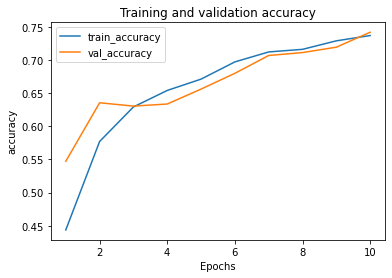

In [18]:
plot_metric(base_model_history,'accuracy')

I would take the first model's graph and validation accuracy as a baseline for the following sequential models. The next step is to try to make an overfit model as i would like to see where the border lies for a 'just right' model. 

In [19]:
from tensorflow import keras
tf.random.set_seed(3) 
overfit_model = keras.Sequential()
overfit_model.add(keras.layers.Dense(units=512, activation='relu', input_shape=(56,)))
overfit_model.add(keras.layers.Dense(units=512, activation='relu'))
overfit_model.add(keras.layers.Dense(units=512, activation='relu'))
overfit_model.add(keras.layers.Dense(units=512, activation='relu'))
overfit_model.add(keras.layers.Dense(10, activation='softmax'))
               
overfit_model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
overfit_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               29184     
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dense_8 (Dense)             (None, 512)               262656    
                                                                 
 dense_9 (Dense)             (None, 512)               262656    
                                                                 
 dense_10 (Dense)            (None, 10)                5130      
                                                                 
Total params: 822,282
Trainable params: 822,282
Non-trainable params: 0
_________________________________________________________________


In [20]:
overfit_history= overfit_model.fit(x_train,y_train,validation_data=(x_val,y_val),batch_size=32,epochs=10)

Epoch 1/10
200/200 [==============================] - 2s 6ms/step - loss: 1.5004 - accuracy: 0.4433 - val_loss: 1.4430 - val_accuracy: 0.4722
Epoch 2/10
200/200 [==============================] - 1s 5ms/step - loss: 1.1527 - accuracy: 0.5742 - val_loss: 1.0431 - val_accuracy: 0.6229
Epoch 3/10
200/200 [==============================] - 1s 5ms/step - loss: 0.9893 - accuracy: 0.6445 - val_loss: 0.9434 - val_accuracy: 0.6592
Epoch 4/10
200/200 [==============================] - 1s 4ms/step - loss: 0.9026 - accuracy: 0.6759 - val_loss: 1.0112 - val_accuracy: 0.6266
Epoch 5/10
200/200 [==============================] - 1s 5ms/step - loss: 0.8565 - accuracy: 0.6887 - val_loss: 0.9382 - val_accuracy: 0.6429
Epoch 6/10
200/200 [==============================] - 1s 5ms/step - loss: 0.7769 - accuracy: 0.7261 - val_loss: 0.8492 - val_accuracy: 0.7011
Epoch 7/10
200/200 [==============================] - 1s 5ms/step - loss: 0.7156 - accuracy: 0.7414 - val_loss: 0.7136 - val_accuracy: 0.7473
Epoch 

In [21]:
val_loss, val_accuracy = overfit_model.evaluate(x_val,y_val)
val_accuracy *100

50/50 [==============================] - 0s 3ms/step - loss: 0.6888 - accuracy: 0.7711


77.11069583892822

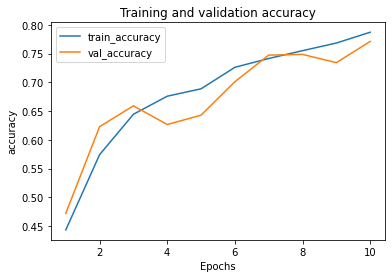

In [22]:
plot_metric(overfit_history,'accuracy')

As you can see, even if the accuracy increases, however, the graph inidicates the results is fluctuating. Hence i would like to continue on to search for the best hyperparameter for this model.

In [23]:
from tensorflow import keras
tf.random.set_seed(3) 
model_1 = keras.Sequential()
model_1.add(keras.layers.Dense(units=512, activation='relu', input_shape=(56,)))
model_1.add(keras.layers.Dense(units=512, activation='relu'))
model_1.add(keras.layers.Dropout(0.2))
model_1.add(keras.layers.Dense(10, activation='softmax'))
               
model_1.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 512)               29184     
                                                                 
 dense_12 (Dense)            (None, 512)               262656    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 10)                5130      
                                                                 
Total params: 296,970
Trainable params: 296,970
Non-trainable params: 0
_________________________________________________________________


In [24]:
model_1_history= model_1.fit(x_train,y_train,validation_data=(x_val,y_val),batch_size=32,epochs=20)

Epoch 1/20
200/200 [==============================] - 1s 4ms/step - loss: 1.5898 - accuracy: 0.4270 - val_loss: 1.2876 - val_accuracy: 0.5247
Epoch 2/20
200/200 [==============================] - 1s 3ms/step - loss: 1.1975 - accuracy: 0.5625 - val_loss: 1.0844 - val_accuracy: 0.6266
Epoch 3/20
200/200 [==============================] - 1s 3ms/step - loss: 1.0648 - accuracy: 0.6165 - val_loss: 1.0724 - val_accuracy: 0.6116
Epoch 4/20
200/200 [==============================] - 1s 3ms/step - loss: 0.9910 - accuracy: 0.6445 - val_loss: 0.9996 - val_accuracy: 0.6329
Epoch 5/20
200/200 [==============================] - 1s 3ms/step - loss: 0.9434 - accuracy: 0.6588 - val_loss: 0.9097 - val_accuracy: 0.6779
Epoch 6/20
200/200 [==============================] - 1s 3ms/step - loss: 0.8903 - accuracy: 0.6806 - val_loss: 0.8935 - val_accuracy: 0.6911
Epoch 7/20
200/200 [==============================] - 1s 3ms/step - loss: 0.8306 - accuracy: 0.7039 - val_loss: 0.8409 - val_accuracy: 0.7023
Epoch 

In [25]:
val_loss, val_accuracy = model_1.evaluate(x_val,y_val)
val_accuracy*100

50/50 [==============================] - 0s 2ms/step - loss: 0.6162 - accuracy: 0.7849


78.48655581474304

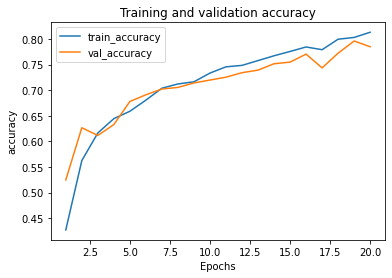

In [26]:
plot_metric(model_1_history,'accuracy')

The model shows that the result is fluctuating. Hence , i would like to tune the hyperparameter further. To do that , i would like to use the keras tuner library. This is to automate the tuning of the hyperparameter of the model which includes the learning rate of the optimiser, number of units in the layers.  First i would need to create the hyper model ( model that will be used for hyperparameter tuning ). 

In [20]:
# hypermodel 

import kerastuner as kt
def build_model(unit): 
    tf.random.set_seed(3)
    model = keras.Sequential()
    hp_units_1 = unit.Int('units', min_value=256, max_value=512, step=32)    
    model.add(keras.layers.Dense(units=hp_units_1, activation='relu',input_shape=(56,)))
    model.add(keras.layers.Dropout(rate=unit.Float('dropout_1',min_value=0.0,max_value=0.5,default=0.25,step=0.05)))
              
    hp_units_2 = unit.Int('units', min_value=128, max_value=256, step=32) 
    model.add(keras.layers.Dense(units=hp_units_2, activation='relu'))        
    model.add(keras.layers.Dropout(rate=unit.Float('dropout_2',min_value=0.0,max_value=0.5,default=0.25,step=0.05)))
              
    hp_units_3 = unit.Int('units', min_value=128, max_value=256, step=32) 
    model.add(keras.layers.Dense(units=hp_units_3, activation='relu'))        
    model.add(keras.layers.Dropout(rate=unit.Float('dropout_2',min_value=0.0,max_value=0.5,default=0.25,step=0.05)))
              
    hp_units_4 = unit.Int('units', min_value=64, max_value=128, step=32) 
    model.add(keras.layers.Dense(units=hp_units_4, activation='relu'))        
    model.add(keras.layers.Dropout(rate=unit.Float('dropout_2',min_value=0.0,max_value=0.5,default=0.25,step=0.05)))
              
    model.add(keras.layers.Dense(10, activation='softmax'))
    
    hp_learning_rate = unit.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'])
              
    return model

/var/folders/22/qly4z7kd12j_7539lt57vw_00000gn/T/ipykernel_2913/1649780784.py:3: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


Once the hypermodel has been made, the tuner will see which combination of hyperparameter can optimize the best validation accuracy. It will then perform trials on different hyperparameter combinations. These trials will then be saved under the folder MLP. Once the trials stopped, the best hyperparameter will be saved.

In [18]:
tuner = kt.Hyperband(build_model, # the hypermodel
                     objective='val_accuracy', # objective to optimize
max_epochs=50,
factor=3, # factor which you have seen above 
directory='MLP/', # directory to save logs 
project_name='FYP_model')

INFO:tensorflow:Reloading Oracle from existing project MLP/FYP_model/oracle.json
INFO:tensorflow:Reloading Tuner from MLP/FYP_model/tuner0.json


2022-08-25 18:14:58.252336: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
tuner.search_space_summary() 

Search space summary
Default search space size: 4
units (Int)
{'default': None, 'conditions': [], 'min_value': 256, 'max_value': 512, 'step': 32, 'sampling': None}
dropout_1 (Float)
{'default': 0.25, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.05, 'sampling': None}
dropout_2 (Float)
{'default': 0.25, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.05, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


The tuner will then search for the best combination based on the range that i have set for the hypermodel. 

In [20]:

# Perform hypertuning
tuner.search(x_train, y_train, epochs=50, validation_data=(x_val,y_val), batch_size = 32)

INFO:tensorflow:Oracle triggered exit


Once the seraching is done ,we can pick out the best hyperparameter and build the model based on that combination.

In [21]:
best_hp=tuner.get_best_hyperparameters()[0]
best_hp.values

{'units': 448,
 'dropout_1': 0.2,
 'dropout_2': 0.0,
 'learning_rate': 0.001,
 'tuner/epochs': 50,
 'tuner/initial_epoch': 17,
 'tuner/bracket': 3,
 'tuner/round': 3,
 'tuner/trial_id': '0047'}

I also included a ModelCheckpoint, where this callback will check if my validation loss has improved from the last epochs , also it will save the best model with the lowest validation loss. This is to prevent overfitting.

In [107]:
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
h_model = tuner.hypermodel.build(best_hp)
h_model.summary()
filepath = 'my_best_model_CSV.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
h_model_history = h_model.fit(x_train, y_train, epochs=100, validation_data = (x_val,y_val),batch_size = 32,callbacks=[checkpoint] )

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_85 (Dense)            (None, 448)               25536     
                                                                 
 dropout_68 (Dropout)        (None, 448)               0         
                                                                 
 dense_86 (Dense)            (None, 448)               201152    
                                                                 
 dropout_69 (Dropout)        (None, 448)               0         
                                                                 
 dense_87 (Dense)            (None, 448)               201152    
                                                                 
 dropout_70 (Dropout)        (None, 448)               0         
                                                                 
 dense_88 (Dense)            (None, 448)             

200/200 [==============================] - 1s 5ms/step - loss: 0.4209 - accuracy: 0.8434 - val_loss: 0.5144 - val_accuracy: 0.8205
Epoch 23/100
191/200 [===========================>..] - ETA: 0s - loss: 0.3907 - accuracy: 0.8595
Epoch 23: val_loss did not improve from 0.51439
200/200 [==============================] - 1s 4ms/step - loss: 0.3902 - accuracy: 0.8598 - val_loss: 0.5425 - val_accuracy: 0.8149
Epoch 24/100
191/200 [===========================>..] - ETA: 0s - loss: 0.3781 - accuracy: 0.8657
Epoch 24: val_loss did not improve from 0.51439
200/200 [==============================] - 1s 4ms/step - loss: 0.3760 - accuracy: 0.8661 - val_loss: 0.5358 - val_accuracy: 0.8143
Epoch 25/100
194/200 [============================>.] - ETA: 0s - loss: 0.3267 - accuracy: 0.8845
Epoch 25: val_loss improved from 0.51439 to 0.48684, saving model to my_best_model_CSV.hdf5
200/200 [==============================] - 1s 5ms/step - loss: 0.3283 - accuracy: 0.8838 - val_loss: 0.4868 - val_accuracy: 0

Epoch 81/100
196/200 [============================>.] - ETA: 0s - loss: 0.0886 - accuracy: 0.9667
Epoch 81: val_loss did not improve from 0.40625
200/200 [==============================] - 1s 5ms/step - loss: 0.0878 - accuracy: 0.9670 - val_loss: 0.5251 - val_accuracy: 0.8705
Epoch 82/100
193/200 [===========================>..] - ETA: 0s - loss: 0.1168 - accuracy: 0.9590
Epoch 82: val_loss did not improve from 0.40625
200/200 [==============================] - 1s 6ms/step - loss: 0.1170 - accuracy: 0.9584 - val_loss: 0.4642 - val_accuracy: 0.8968
Epoch 83/100
200/200 [==============================] - ETA: 0s - loss: 0.0949 - accuracy: 0.9639
Epoch 83: val_loss did not improve from 0.40625
200/200 [==============================] - 1s 4ms/step - loss: 0.0949 - accuracy: 0.9639 - val_loss: 0.4862 - val_accuracy: 0.8737
Epoch 84/100
199/200 [============================>.] - ETA: 0s - loss: 0.1098 - accuracy: 0.9601
Epoch 84: val_loss did not improve from 0.40625
200/200 [==============

50/50 [==============================] - 0s 2ms/step - loss: 0.4711 - accuracy: 0.8956


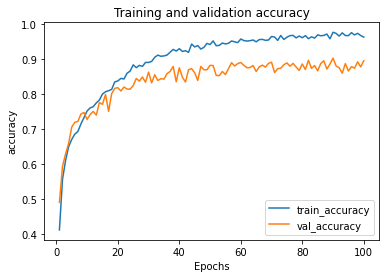

In [110]:
val_loss, val_accuracy = h_model.evaluate(x_val,y_val)
val_accuracy*100
plot_metric(h_model_history,'accuracy')

Seeing that the model checkpoint has helped me saved my best mdel with the lowest validation loss, i would use this model to train my whole training set and evaluate against the test set.

In [111]:
tf.random.set_seed(3)
final_model = load_model(filepath)
h_model_history_final = final_model.fit(X_train, Y_train, epochs=100, validation_data = (x_test,y_test),batch_size = 32)

Epoch 1/100
250/250 [==============================] - 2s 6ms/step - loss: 0.3353 - accuracy: 0.8881 - val_loss: 0.4954 - val_accuracy: 0.8403
Epoch 2/100
250/250 [==============================] - 1s 5ms/step - loss: 0.2589 - accuracy: 0.9102 - val_loss: 0.4364 - val_accuracy: 0.8539
Epoch 3/100
250/250 [==============================] - 1s 5ms/step - loss: 0.2366 - accuracy: 0.9184 - val_loss: 0.4249 - val_accuracy: 0.8634
Epoch 4/100
250/250 [==============================] - 2s 7ms/step - loss: 0.2240 - accuracy: 0.9210 - val_loss: 0.4433 - val_accuracy: 0.8709
Epoch 5/100
250/250 [==============================] - 1s 6ms/step - loss: 0.2083 - accuracy: 0.9257 - val_loss: 0.4207 - val_accuracy: 0.8689
Epoch 6/100
250/250 [==============================] - 1s 6ms/step - loss: 0.2114 - accuracy: 0.9256 - val_loss: 0.4015 - val_accuracy: 0.8744
Epoch 7/100
250/250 [==============================] - 1s 6ms/step - loss: 0.2090 - accuracy: 0.9258 - val_loss: 0.3883 - val_accuracy: 0.8899

Epoch 58/100
250/250 [==============================] - 1s 4ms/step - loss: 0.1143 - accuracy: 0.9596 - val_loss: 0.4644 - val_accuracy: 0.8984
Epoch 59/100
250/250 [==============================] - 1s 4ms/step - loss: 0.0739 - accuracy: 0.9745 - val_loss: 0.4348 - val_accuracy: 0.8979
Epoch 60/100
250/250 [==============================] - 1s 4ms/step - loss: 0.0779 - accuracy: 0.9733 - val_loss: 0.4209 - val_accuracy: 0.9024
Epoch 61/100
250/250 [==============================] - 1s 4ms/step - loss: 0.0679 - accuracy: 0.9761 - val_loss: 0.4622 - val_accuracy: 0.8939
Epoch 62/100
250/250 [==============================] - 1s 5ms/step - loss: 0.0931 - accuracy: 0.9688 - val_loss: 0.4168 - val_accuracy: 0.9014
Epoch 63/100
250/250 [==============================] - 1s 4ms/step - loss: 0.0888 - accuracy: 0.9661 - val_loss: 0.3649 - val_accuracy: 0.9154
Epoch 64/100
250/250 [==============================] - 1s 4ms/step - loss: 0.0701 - accuracy: 0.9750 - val_loss: 0.4310 - val_accuracy:

This resulted me getting a test accuracy of 91.1%

In [112]:
 test_loss,test_accuracy = final_model.evaluate(x_test,y_test)
print('test accuracy', test_accuracy*100)

63/63 [==============================] - 0s 3ms/step - loss: 0.3900 - accuracy: 0.9114
test accuracy 91.14114046096802


 I created the confusion matrix and the classification report for the sequential model once the test accuracy had been attained. 

63/63 [==============================] - 0s 2ms/step


<AxesSubplot:>

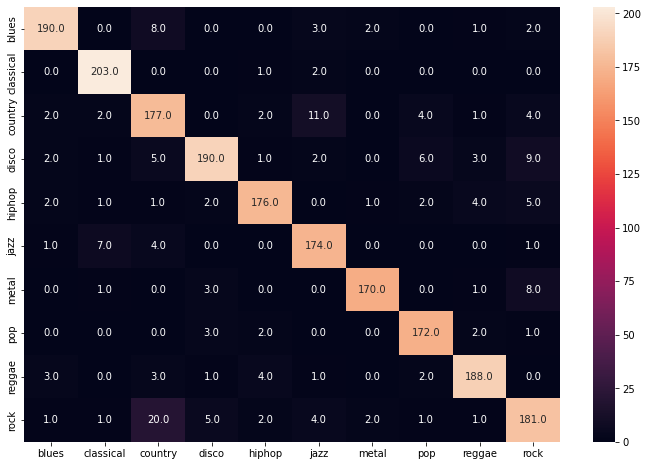

In [101]:
from sklearn.metrics import accuracy_score, confusion_matrix 
y_pred = np.argmax(final_model.predict(x_test), axis =1)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12,8))
sns.heatmap(conf_matrix,annot=True,fmt = ".1f",xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
           yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"])

In [102]:

y_pred = final_model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
y_ground_truth = y_test

print(classification_report(y_ground_truth, y_pred))

63/63 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       206
           1       0.94      0.99      0.96       206
           2       0.81      0.87      0.84       203
           3       0.93      0.87      0.90       219
           4       0.94      0.91      0.92       194
           5       0.88      0.93      0.91       187
           6       0.97      0.93      0.95       183
           7       0.92      0.96      0.94       180
           8       0.94      0.93      0.93       202
           9       0.86      0.83      0.84       218

    accuracy                           0.91      1998
   macro avg       0.91      0.91      0.91      1998
weighted avg       0.91      0.91      0.91      1998




I decided to use the SVM as my final model and use it to make some predictions because it performed better than the other 3 models. I selected a random sample from the test set and made predictions using it to demonstrate the model's accuracy and efficiency. The ground truth represents the genre index as it should actually be, while the predicted index is what my SVM model predicted as the outcome. 



In [54]:
sample = x_test.sample()
prediction = best_svc_model.predict(sample)
prediction_index = prediction
ground_truth = y_test[sample.index].iloc[0]
print('Random row to be predicted: ', sample.index)
print("Ground_truth: {}, Predicted Index: {}".format(ground_truth, prediction_index))


Random row to be predicted:  Int64Index([2256], dtype='int64')
Ground_truth: 2, Predicted Index: [2]
